In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from typing import List, Tuple

In [2]:
PAIRS_DIR: str = r"C:\Users\igor\Desktop\Studia\I\Semestr6\ZAW\Lab6\data\pairs\pairs"

In [3]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC+cv2.fisheye.CALIB_FIX_SKEW

width = 9 
height = 6
square_size = .025

objp = np.zeros((height * width, 1, 3), np.float64)
objp[:, 0, :2] = np.mgrid[0:width, 0:height].T.reshape(-1, 2)
objp = objp * square_size # Create real world coords. Use your metric.
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
img_width = 640
img_height = 480
image_size = (img_width, img_height)

image_dir = PAIRS_DIR
number_of_images = 50
for i in range(1, number_of_images):
    img = cv2.imread(os.path.join(PAIRS_DIR, f"left_{str(i).zfill(2)}.png"), 0)
    gray = img.astype(np.uint8)
    ret, corners = cv2.findChessboardCorners(gray, (width, height), cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    Y, X, *_= img.shape
    if ret:
        minRx = corners[:,:,0].min()
        minRy = corners[:,:,1].min()
        border_threshold_x = X/12
        border_threshold_y = Y/12
        x_thresh_bad = minRx < border_threshold_x
        y_thresh_bad = minRy < border_threshold_y
        if y_thresh_bad or x_thresh_bad: continue
        objpoints.append(objp)
        imgpoints.append(cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria))
N_OK = len(objpoints)
K = np.zeros((3, 3))
D = np.zeros((4, 1))
rvecs = [np.zeros((1, 1, 3), dtype=np.float64) for _ in range(N_OK)]
tvecs = [np.zeros((1, 1, 3), dtype=np.float64) for _ in range(N_OK)]

ret, K, D, _, _ = cv2.fisheye.calibrate(objpoints, imgpoints, image_size, K, D, rvecs, tvecs, calibration_flags, (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6))
map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K, image_size, cv2.CV_16SC2)



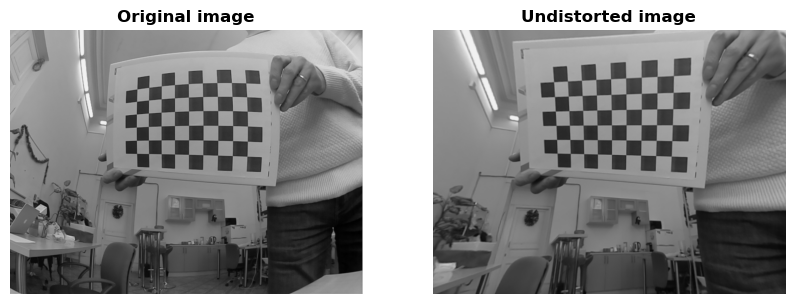

In [4]:
image = cv2.imread(os.path.join(image_dir,"right_01.png"))

undistorted_image = cv2.remap(image, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)


# show two images next to each other
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title("Original image")
ax[0].axis("off")
ax[1].imshow(undistorted_image)
ax[1].set_title("Undistorted image")
ax[1].axis("off")
plt.show()

        

In [5]:
for i in range(1, 50):
    I = cv2.imread(os.path.join(PAIRS_DIR,"left_%02d.png" % i))
    cv2.imshow("I",cv2.remap(I, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT))
    cv2.waitKey(50)
    if 0xFF == ord("q"): 
        break
cv2.destroyAllWindows()

In [6]:
print(K)

[[330.14866857   0.         340.93975281]
 [  0.         330.72797646 235.64722375]
 [  0.           0.           1.        ]]


2.

In [7]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC+cv2.fisheye.CALIB_FIX_SKEW

width = 9 
height = 6
square_size = .025

objp = np.zeros((height * width, 1, 3), np.float64)
objp[:, 0, :2] = np.mgrid[0:width, 0:height].T.reshape(-1, 2)
objp = objp * square_size # Create real world coords. Use your metric.
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints_left = [] # 2d points in image plane.
imgpoints_right = [] # 2d points in image plane.
img_width = 640
img_height = 480
image_size = (img_width, img_height)

image_dir = PAIRS_DIR
number_of_images = 50
for i in range(1, number_of_images):
    # read image
    gray_left = cv2.imread(os.path.join(image_dir, f"left_{str(i).zfill(2)}.png"), 0)
    gray_right = cv2.imread(os.path.join(image_dir, f"right_{str(i).zfill(2)}.png"), 0)

    ret_left, corners_left = cv2.findChessboardCorners(gray_left, (width, height), cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    ret_right, corners_right = cv2.findChessboardCorners(gray_right, (width, height), cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

    Y, X, *_= img.shape
    if ret_left and ret_right:
        minRx_left = corners_left[:,:,0].min()
        minRy_left = corners_left[:,:,1].min()
        minRx_right = corners_right[:,:,0].min()
        minRy_right = corners_right[:,:,1].min()

        border_threshold_x = X/12
        border_threshold_y = Y/12

        x_thresh_bad_left = minRx_left < border_threshold_x
        y_thresh_bad_left = minRy_left < border_threshold_y
        x_thresh_bad_right = minRx_right < border_threshold_x
        y_thresh_bad_right = minRy_right < border_threshold_y
        
        if y_thresh_bad or x_thresh_bad: continue
        
        objpoints.append(objp)
        imgpoints_left.append(cv2.cornerSubPix(gray, corners_left, (11, 11), (-1, -1), criteria))
        imgpoints_right.append(cv2.cornerSubPix(gray, corners_right, (11, 11), (-1, -1), criteria))
    
N_OK = len(objpoints)
K = np.zeros((3, 3))
D = np.zeros((4, 1))
rvecs = [np.zeros((1, 1, 3), dtype=np.float64) for _ in range(N_OK)]
tvecs = [np.zeros((1, 1, 3), dtype=np.float64) for _ in range(N_OK)]

ret_left, K_left, D_left, _, _ = cv2.fisheye.calibrate(objpoints.copy(), imgpoints_left, image_size, K, D, rvecs, tvecs, calibration_flags, (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6))
ret_right, K_right, D_right, _, _ = cv2.fisheye.calibrate(objpoints, imgpoints_right, image_size, K, D, rvecs, tvecs, calibration_flags, (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6))

# map1_right, map2_right = cv2.fisheye.initUndistortRectifyMap(K_right, D_right, np.eye(3), K_right, image_size, cv2.CV_16SC2)
# map1_left, map2_left = cv2.fisheye.initUndistortRectifyMap(K_left, D_left, np.eye(3), K_left, image_size, cv2.CV_16SC2)

imgpointsLeft = np.asarray(imgpoints_left, dtype=np.float64)
imgpointsRight = np.asarray(imgpoints_right, dtype=np.float64)

RMS, _, _, _, _, rotationMatrix, translationVector = cv2.fisheye.stereoCalibrate(
    objpoints, imgpointsLeft, imgpointsRight,
    K_left, D_left,
    K_right, D_right,
    image_size, None, None,
    cv2.CALIB_FIX_INTRINSIC,
    (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 0.01)
    )
R2 = np.zeros([3,3])
P1 = np.zeros([3,4])
P2 = np.zeros([3,4])
Q = np.zeros([4,4])
# Rectify calibration results
leftRectification, rightRectification, leftProjection, rightProjection,dispartityToDepthMap = cv2.fisheye.stereoRectify(
    K_left, 
    D_left,
    K_right, 
    D_right,
    image_size,
    rotationMatrix, 
    translationVector,
    0, 
    R2, 
    P1, 
    P2, 
    Q,
    cv2.CALIB_ZERO_DISPARITY, 
    (0,0), 
    0, 
    0)

map1_left, map2_left = cv2.fisheye.initUndistortRectifyMap(
    K_left, 
    D_left, 
    leftRectification, 
    leftProjection, 
    image_size, 
    cv2.CV_16SC2)

map1_right, map2_right = cv2.fisheye.initUndistortRectifyMap(
    K_right, 
    D_right, 
    rightRectification, 
    rightProjection, 
    image_size, 
    cv2.CV_16SC2)

(-0.5, 639.5, 479.5, -0.5)

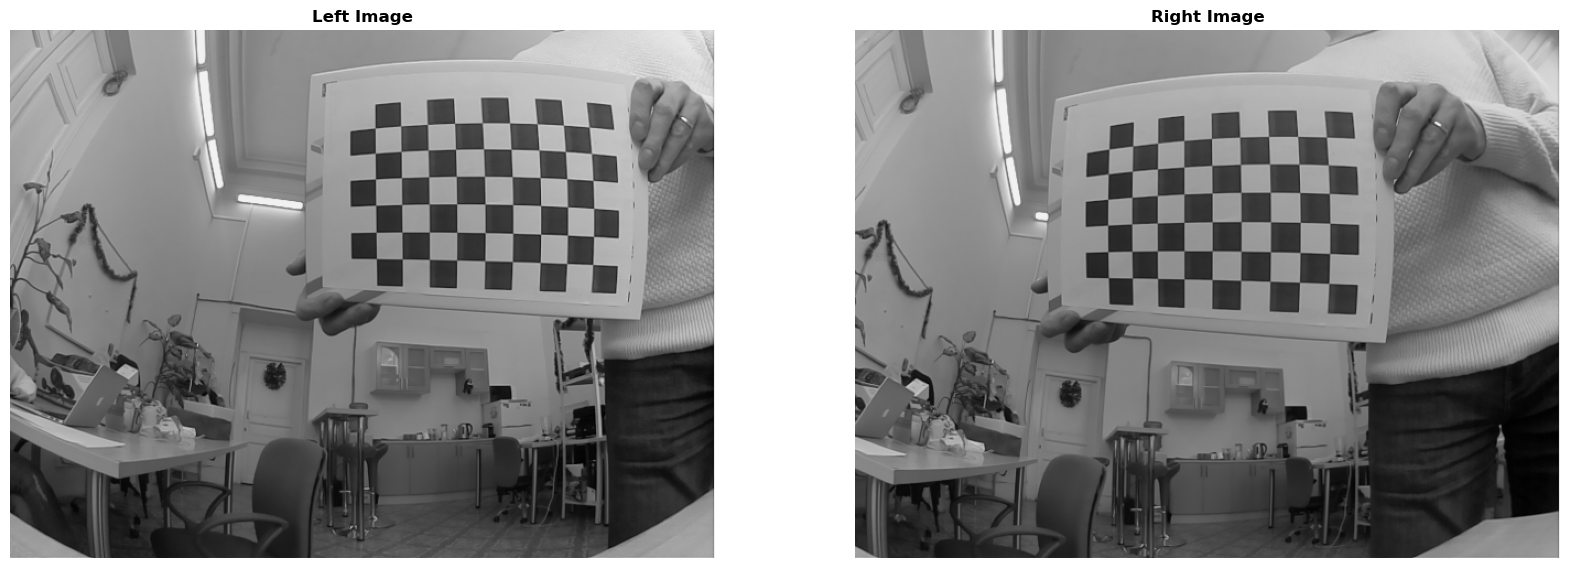

In [8]:
image_left = cv2.imread(os.path.join(image_dir,"left_01.png"))
image_right = cv2.imread(os.path.join(image_dir,"right_01.png"))

# subplot of 2
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(image_left)
ax[0].set_title("Left Image")
ax[0].axis("off")
ax[1].imshow(image_right)
ax[1].set_title("Right Image")
ax[1].axis("off")

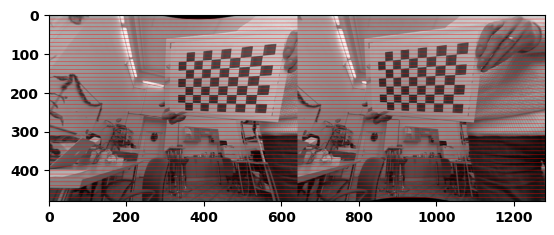

In [9]:
dst_L = cv2.remap(image_left, map1_left, map2_left, cv2.INTER_LINEAR)
dst_R = cv2.remap(image_right, map1_right, map2_right, cv2.INTER_LINEAR)

N, XX, YY = dst_L.shape[::-1] # RGB image size
visRectify = np.zeros((YY, XX*2, N), np.uint8) 
visRectify[:,0:XX:,:] = dst_L # left image assignment
visRectify[:,XX:XX*2:,:] = dst_R # right image assignment
# draw horizontal lines
for y in range(0,YY,10):
    cv2.line(visRectify, (0,y), (XX*2,y), (255,0,0))
plt.imshow(visRectify) # display image with lines


3. 

(-0.5, 639.5, 479.5, -0.5)

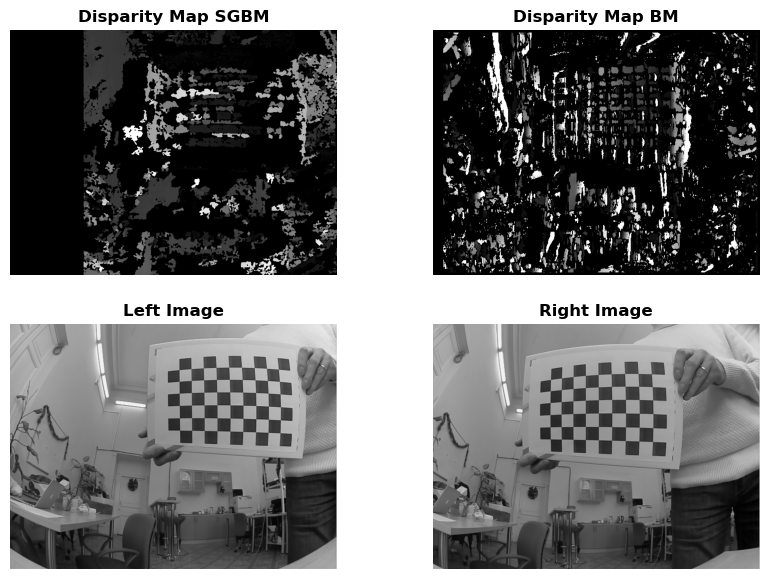

In [10]:
gray_left = cv2.cvtColor(image_left, cv2.COLOR_BGR2GRAY)
gray_right = cv2.cvtColor(image_right, cv2.COLOR_BGR2GRAY)

params_sgbm = dict(
    minDisparity = 16,
    numDisparities = 128,
    uniquenessRatio = 10,
    speckleWindowSize = 100,
    speckleRange = 32,
    disp12MaxDiff = 1,
    P1 = 24,
    P2 = 96,
)
stereo_manager_sgbm = cv2.StereoSGBM_create(**params_sgbm)
disparity_map_sgbm = stereo_manager_sgbm.compute(gray_left, gray_right).astype(np.float32) / 16.0

params_bm = dict(
    numDisparities = 16,
    blockSize = 11
)

stereo_manager_bm = cv2.StereoBM_create(**params_bm)
disparity_map_bm = stereo_manager_bm.compute(gray_left, gray_right).astype(np.float32) / 16.0


fig, ax = plt.subplots(2, 2, figsize=(10, 7))
ax[0,0].imshow(disparity_map_sgbm, cmap="gray")
ax[0,0].set_title("Disparity Map SGBM")
ax[0,0].axis("off")
ax[0,1].imshow(disparity_map_bm, cmap="gray")
ax[0,1].set_title("Disparity Map BM")
ax[0,1].axis("off")
ax[1,0].imshow(image_left)
ax[1,0].set_title("Left Image")
ax[1,0].axis("off")
ax[1,1].imshow(image_right)
ax[1,1].set_title("Right Image")
ax[1,1].axis("off")

